# Regression

![](/regression_classification/fig/ML_diagram.png)

Regression is a group of supervised learning techniques, alternative to classification. In classification, given a datapoint $x \in \mathbb{R}^n$, the task was to learn a model $y = f_\theta(x)$ such that $y$ represents one of the $K$ possible classes in which $x$ lies. On the other side, a Machine Learning problem is a **Regression** when the target variable $y \in \mathbb{R}$ is a **continuous** variable, and the task is to approximately *interpolate* between the $y$ values, with the intent of being able to predict new outcome of $y$ when a new $x$ is given as input.

![](/regression_classification/fig/regression_vs_classification.png)

A part from that, the computation procedure to define a regression model is similar to the procedure required for a classification model. Indeed, let $f_\theta(x)$ be a parametric function of $x \in \mathbb{R}^n$, parameterized by $\theta \in \mathbb{R}^d$. Given a dataset $(X, Y)$ with:

$$
    X = [x^1 x^2 \dots x^N] \in \mathbb{R}^{n \times N},
$$

and

$$
    Y = [y^1 y^2 \dots y^N] \in \mathbb{R}^N,
$$

the task is to **train** the model (i.e. to optimize the parameters $\theta$), such that $f_\theta(x^i) \approx y^i$ for any $i = 1, \dots, N$. Clearly, this is done by solving the optimization problem:

$$
    \theta^* = \arg\min_{\theta \in \mathbb{R}^d} \ell(\theta; X, Y).
$$

Here, $\ell(\theta; X, Y)$ is a **loss function**, which describes how to optimize the parameters to achieve the regression task. When $n>1$, $f_\theta(x)$ is called **multivariate regression model**, while if $n=1$, $f_\theta(x)$ is an **univariate regression model**. For simplicity, from now on we will work with univariate regression models, where $x^i \in \mathbb{R}$ for any $i = 1, \dots, N$, and consequently $X = [x^1 x^2 \dots x^N] \in \mathbb{R}^N$.

```{note}
Note that we slightly changed the notation compared to the previous chapters. Indeed, the dimensionality of each input data vector $x$ is now named $n$ instead of $d$, which now refers to the dimension of the parameter vector. This choice will be clearer later, and it has been done to make the code more coherent through the lecture topics, since now our focus is on the variable $\theta$, and not on $x$, which will be assumed to have dimension 1.
```

## Linear Regression
The simplest regression model we can think of is the Linear Regression Model, defined as

$$
    f_\theta(x) = \theta_1 + \theta_2 x = \theta^T \hat{x}
$$

where $\theta = [\theta_1, \theta_2]^T$ and $\hat{x} = [1, x]^T$. It defines a straight line, which approximates the data after the parameters have been optimized. Clearly, the resulting model will be correct if and only if the real function $y = f(x)$ generating the data is linear. Unfortunately, even in situations where $f(x)$ can be considered linear, the collected data $y$ is always corrupted by noise, which consequently breaks the linearity.

Let's see for example what happens when we consider data such that $y = 2x$: 

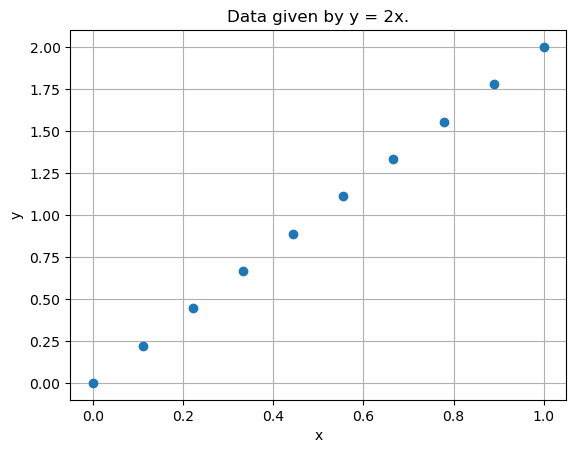

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define arbitrarly x
x = np.linspace(0, 1, 10)
y = 2 * x

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

It is clearly possible to perfectly approximate these data by a linear model. Indeed, if $\theta = [0, 2]$, then:

$$
f_\theta(x) = \theta_1 + \theta_2 x = 0 + 2x = 2x,
$$

which will match exactly the function that generates the data. 

Unfortunately, the same won't hold if the collected data is corrupted by noise (as it is common) in practical applications.

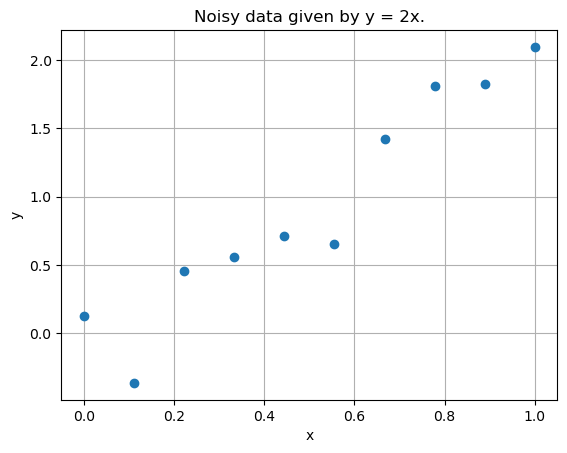

In [2]:
# Consider a little bit of noise
y_noisy = y + np.random.normal(loc=0, scale=0.2, size=y.shape)

# Visualize the noisy data
plt.plot(x, y_noisy, 'o')
plt.title("Noisy data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Here we want our model to approximately learn the data, somehow ignoring the noise. Luckily, at least when the noise is Gaussian distributed, this is usually what happens. 

## Training a model
As we will see in greater detail in the next section, **training** a linear regression model means solving the optimization problem:

$$
\theta^* = \arg\min_{\theta} \ell(\theta; X, Y).
$$

Where the loss function $\ell(\theta; X, Y)$ is usually chosen to be the **Mean Squared Error (MSE)** which, for a linear regression model, is defined as:

$$
\ell(\theta; X, Y) = \frac{1}{N} \sum_{i=1}^N (f_\theta(x^i) - y^i)^2 = \frac{1}{N} \sum_{i=1}^N (\theta_1 + \theta_2 x^i - y^i)^2.
$$

Note that this is a simple least squares problem, which can be written in matrix form as:

$$
\theta^* = \arg\min_{\theta} \underbrace{\frac{1}{N} || X^T \theta - Y ||_2^2}_{\ell(\theta; X, Y)},
$$

where:

$$
X = \begin{bmatrix} 1 & 1 & \dots & 1 \\ x^1 & x^2 & \dots & x^N \end{bmatrix} \in \mathbb{R}^{2 \times N}, \qquad Y = \begin{bmatrix} y^1 & y^2 & \dots & y^N \end{bmatrix} \in \mathbb{R}^N.
$$

Therefore, it can be solved either by normal equation method, solving:

$$
XX^T \theta = XY,
$$

or by Gradient Descent, by observing that:

$$
\nabla_\theta \ell(\theta; X, Y) = X(X^T \theta - Y).
$$

> **Exercise:** Write down an algorithm that solves the linear regression task on the noisy data given above. Use Normal Equation method to train it. 


## Polynomial Regression
Linear regression model is too rigid to correctly approximate the data when the relationship between the input and output variables $x$ and $y$ is complex. 

To see this, take a look at the data contained into the `poly_regression_small.csv` file, which can be downloaded from Virtuale.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("../code/data/poly_regression_small.csv")
x, y = data["x"], data["y"]

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Complex data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../code/data/poly_regression_small.csv'

Clearly, no straight line will be able to correctly approximate it. 

> **Exercise:** Train a linear regression model to approximate the data above, and visualize the prediction.

To make the model more flexible and able to capture the complexity of the distribuition of this data, we can consider a non-linear regression model. In particular, given a number $K > 0$, define:

$$
    f_\theta(x) = \sum_{j=0}^K \phi_j(x) \theta_j,
$$

where the functions $\phi_1, \phi_2, \dots, \phi_K$ are called **feature vectors**. Note that, for $K = 2$ and $\phi_0(x) = 1$, $\phi_1(x) = x$, we recover the linear regression model $f_\theta(x) = \theta_1 + \theta_2 x$. For different values of $K$ and different feature vectors $\phi_j(x)$, we get different regression model.

Note that, if $\theta = [\theta_1, \theta_2, \dots, \theta_K]^T$ and $\phi(x) = [\phi_1(x), \phi_2(x), \dots, \phi_K(x)]^T$, then

$$
    f_\theta(x) = \phi^T(x) \theta
$$

which implies that $f_\theta(x)$ is a *linear function* in $\theta$, for any choice of $\phi_j(x)$. The *non-linearity* is therefore only as a function of $x$.

A classical choice for the feature vector is $\phi_j(x) = x^{j-1}$. In this way, for a given $K>0$, $\phi(x)$ represents the vector of the first $K$ monomial in $x$, i.e.

$$
    \phi(x) = [1, x, x^2, \dots, x^{K-1}]^T
$$

and $f_\theta(x)$ is a $K-1$-th degree polynomial. For this reason, $f_\theta(x)$ is called **polynomial regression model** for this choice of $\phi_j(x)$. 

When the loss function $\ell(\theta; X, Y)$ is the Mean Squared Error, training a polynomial regression model is similar to the training of the linear regression model. In particular, if:

$$
\Phi(X) = \begin{bmatrix} 1 & 1 & \dots & 1 \\ x^1 & x^2 & \dots & x^N \\ (x^1)^2 & (x^2)^2 & \dots & (x^N)^2 \\ \vdots & \vdots & \dots & \vdots \\ (x^1)^{K-1} & (x^2)^{K-1} & \dots & (x^N)^{K-1} \end{bmatrix}, \qquad Y = \begin{bmatrix} y^1 & y^2 & \dots & y^N \end{bmatrix},
$$

then:

$$
\ell(\theta; X, Y) = \frac{1}{N} || \Phi(X)^T \theta - Y ||_2^2,
$$

whose normal equations read:

$$
\Phi(X)\Phi(X)^T \theta = \Phi(X) Y.
$$

> **Exercise:** Train a polynomial regression model over the data above. Try different values for the polynomial degree $K$. Compare the results with the polynomial: $f(x) = 4x^2 - 3x^4$. What do you observe for large values of $K$ (e.g. $K=8$)?
> Repeat the experiment by training it on the data from `poly_regression_large.csv`. Do you observe something?